In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [66]:
from sensorcnn.visualization.examples import *
from sensorcnn.dataset.examples import *

In [10]:
arms_df = load_from_csv("~/Google Drive/Exercise Data/arms_0A5E8ACF-34B1-49BC-90B9-1F4DE16A9E10.csv")

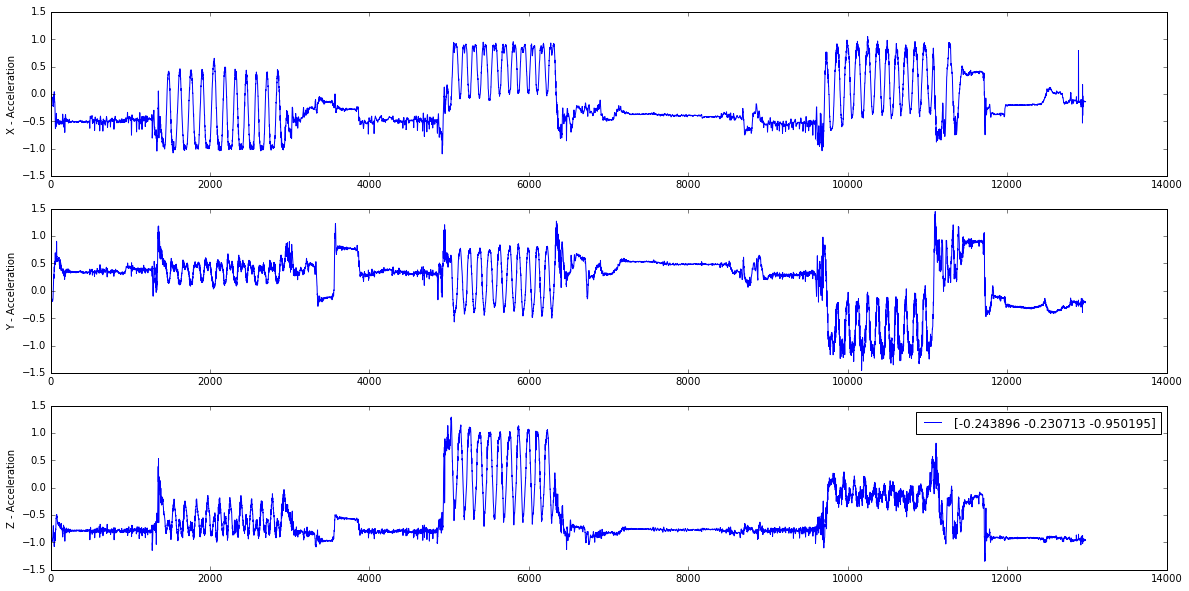

In [11]:
X = get_features(arms_df)
fig = plot_examples(X)

(12984, 3)
(12984, 3)


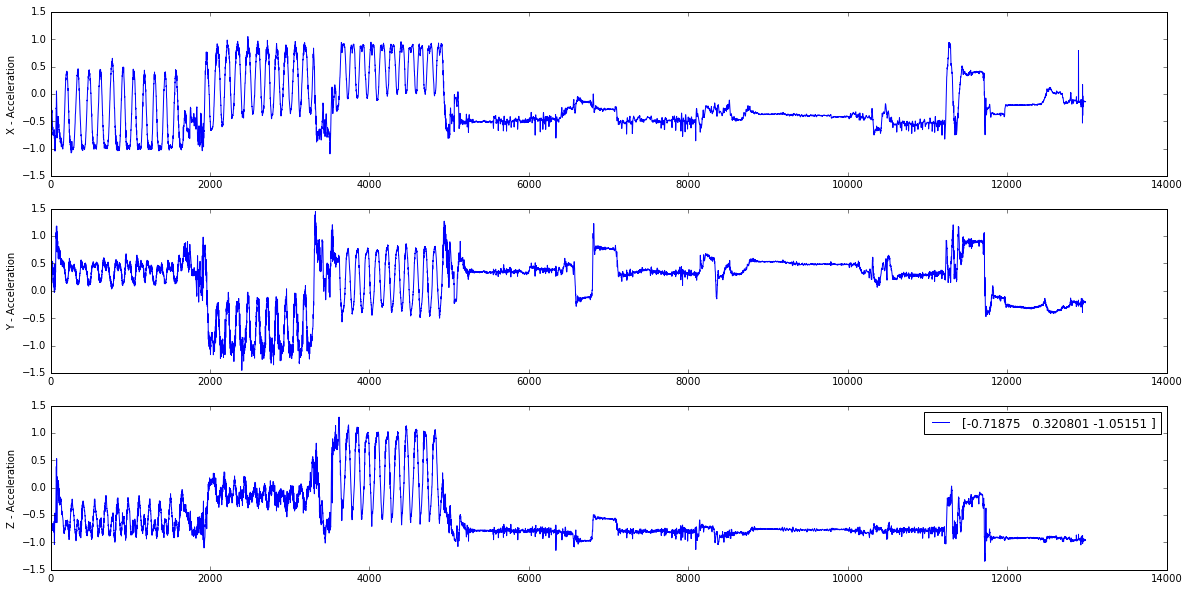

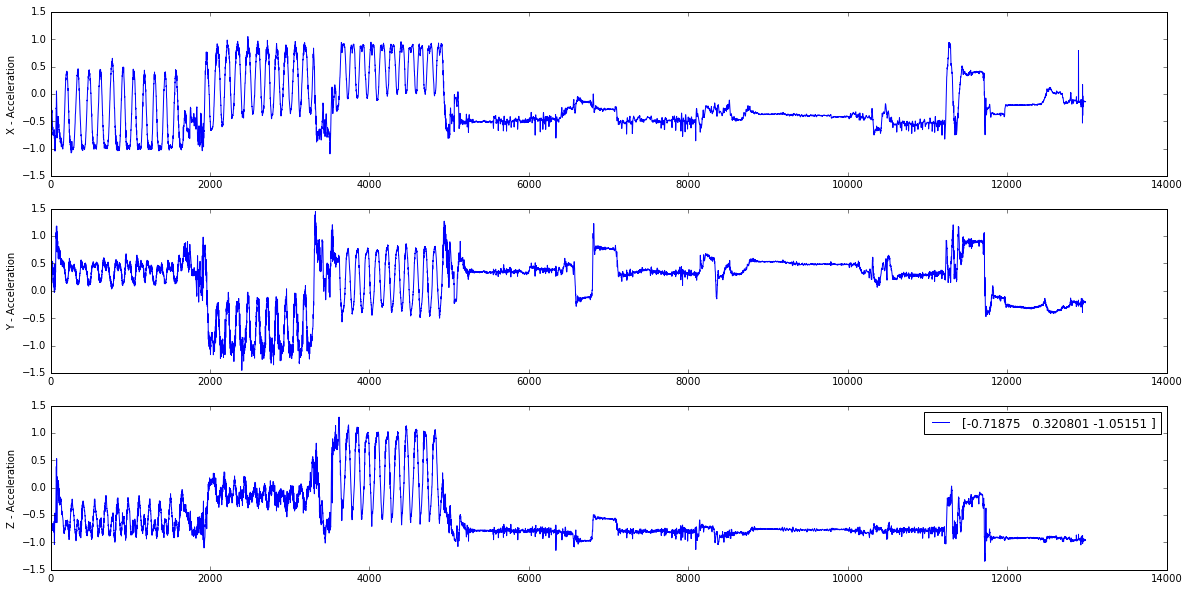

In [21]:
X, Y = label_examples(arms_df)
print(X.shape)
print(Y.shape)
plot_examples(X)

In [67]:
root_directory = "/Users/mostafa/Google Drive/Exercise Data/"
[x for x in csv_file_iterator(root_directory)]
labels = []
dfs = []
for f in csv_file_iterator(root_directory):
    df = load_from_csv(f)
    dfs.append(df)
    labels_counts = df['label'].value_counts()
    labels.extend([l for l in labels_counts.keys() if l not in labels])

/Users/mostafa/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3006: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [86]:
from sensorcnn.dataset.examples import *
n_labels = len(labels)
n_features = 3

X = np.zeros((0, n_features))
Y = np.zeros((0, n_labels))

for df in dfs:
    features, targets = label_examples(df, labels=labels)
    X = np.append(X, features, axis=0)
    Y = np.append(Y, targets, axis=0)

In [87]:
print(X.shape)
print(Y.shape)

(6557118, 3)
(6557118, 117)


In [90]:
np.savez_compressed("/Users/mostafa/Desktop/muvr.npz", X, Y)